# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [64]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 

#### Question 2. Create a summary table

In [81]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of GRE values is larger than GPA - the variance is larger. 

#### Question 4. Drop data points with missing data


In [16]:
dropped_na_df = df_raw.dropna()
print dropped_na_df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [15]:
dropped_na_df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The percentiles now have values rather than NaN.

#### Question 6. Create box plots for GRE and GPA

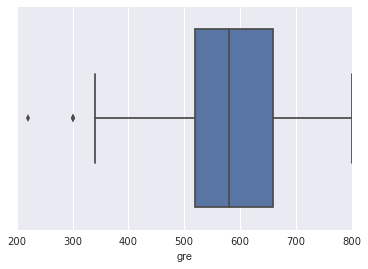

In [70]:
#boxplot 1
#dropped_na_df.boxplot(column='gre', return_type='axes')
sns.boxplot(x=dropped_na_df['gre'])

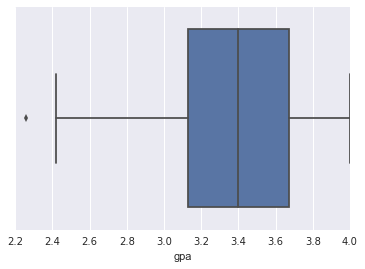

In [67]:
#boxplot 2 
#dropped_na_df.boxplot(column='gpa', return_type='axes')
sns.boxplot(x=dropped_na_df['gpa'])

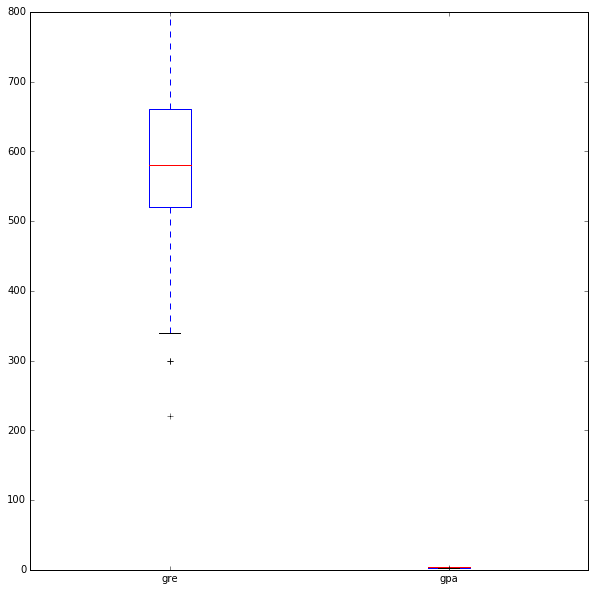

In [36]:
df = dropped_na_df
df[['gre', 'gpa']].plot(kind='box', figsize=(10,10));

#### Question 7. What do this plots show?

Answer:  Red line is the median. Box ending lines represent quartiles. Crosses mark outliers. 
The scale between the two vastly differs. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1269aced0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126c413d0>]], dtype=object)

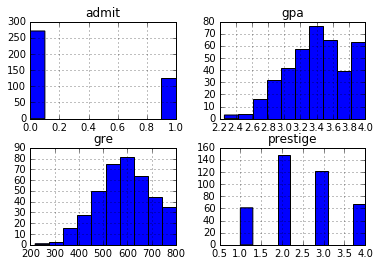

In [59]:
# plot the distribution of each variable        
df.hist()

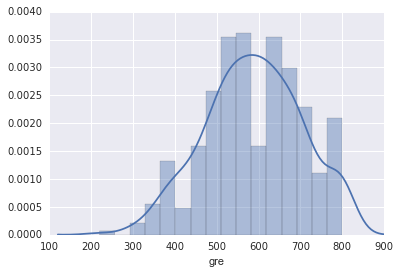

In [82]:
sns.distplot(df['gre'])

# this below code didnt really work because they all got added to same graph
# for var in df.columns:
#     sns.distplot(df[var])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [84]:
print "Skew:"
print df.skew()
print "Kurtosis"
print df.kurt()

Skew:
admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64
Kurtoisis
admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


Answer: No, a normal distrubtion has skewness = 0, and kurtosis of 3. And the mean, median, and mode should all be equal. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 
Yes. GRE, GPA is not symmetrical, with skewness to the right. The kurtosis on all of them are too low.

If we correct the distribution then we can find and use the Standard Deviation to make claims about the data. 

How to correct the distribution? I'm not sure. Remove dummy variables? 

#### Question 11. Which of our variables are potentially colinear? 

In [60]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None were zero, so maybe none are colinear? But maybe GPA and prestige because of that -0.06 value is close to zero - but maybe not close enough? 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Is there an association between the prestige of undergrad schools and graduate admission rates at this particular college during this particular time span that we have data for. 

#### Question 14. What is your hypothesis? 

Answer:  Students who come from more prestigious schools will me more likely to be admitted. 

Null hypothesis: Students are admitted regardless of UG prestige. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data